In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import preprocess
import model
import pred_test
from scipy.stats import pearsonr
import itertools
from scipy.stats import pearsonr, spearmanr, ks_2samp
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pickle
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import roc_curve,auc,confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, roc_auc_score, recall_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

importing Jupyter notebook from preprocess.ipynb
importing Jupyter notebook from model.ipynb
importing Jupyter notebook from pred_test.ipynb


# **RF**

60
0.9986233861442593 0.8533343666273506 0.17153667766586753
yolo:  0.8533343666273506 0.17153667766586753


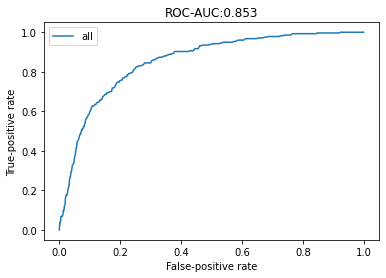

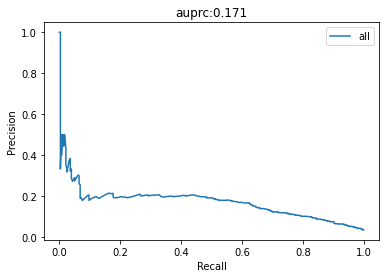

In [2]:
cov_train = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds_with_val/preprocessed_covariate_race_matrix_post_surgery_7_days_train_{}.csv".format('1225'))
cov_test = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds_with_val/preprocessed_covariate_race_matrix_post_surgery_7_days_test_{}.csv".format('1225'))
cov_val = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds_with_val/preprocessed_covariate_race_matrix_post_surgery_7_days_val_{}.csv".format('1225'))

cov_train_final, cov_test_final, cov_val_final = preprocess.preprocess(cov_train, cov_test, cov_val)
f = open(r'columns_60', 'rb')
fin_cols = pickle.load(f)
print(len(fin_cols))
cov_train_final = cov_train_final[fin_cols]
cov_test_final = cov_test_final[fin_cols]

rf, best_params, best_score_train = model.rf_models(cov_train_final, n_boots = 1)
roc, ap = [], []
for r in rf:
    roc_train, roc_test, pr_test, re_test, spec_test, auprc, pr, re, thresh_test, \
    predictions = pred_test.pred_rf_test(r, cov_train_final, cov_test_final, thresh = 0.5)
    print(roc_train, roc_test, auprc)
    roc.append(roc_test)
    ap.append(auprc)
print(sum(roc)/len(rf), sum(ap)/len(rf))

1225
0.8438308987462948 0.14408628579184118
0.8548034509033782 0.1633195118385748
0.8517172316261434 0.17132335689353395
0.8526088956759782 0.1759047088133056
0.849524916197914 0.14704758928190048
0.849905458077007 0.16844741398967655
0.849154453415089 0.14850740411451632
0.8461340842334714 0.15686086386649112
0.8490095384087482 0.14967763824056657
0.8498823881455493 0.15907157497161759
5624
0.8465558384173042 0.14908074799724041
0.8525815701260961 0.16085425367165035
0.8451658190520006 0.15092446087285447
0.8517665072078977 0.18752208406478374
0.8470268681828912 0.170062565782269
0.8513499045621573 0.16513188875642812
0.846721359576015 0.14515576320366022
0.8408333755162177 0.14123110031326996
0.8415881878367257 0.13391795512575122


pred_test.ipynb:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  "metadata": {},


0.8472461445216977 0.1601282146358804
992578
0.8492807780883135 0.16110959351666376
0.8488865734342796 0.16843645681887823
0.8537502973333398 0.15608383445905738
0.8524238882644826 0.15608382686072944
0.8514527113440901 0.14692708902688165
0.8533903616066169 0.16616250476051497
0.8432156259141181 0.1413978871436788
0.851369166835025 0.15932152089514373
0.8556433755923708 0.16822805554681086
0.8542370056931216 0.15932703635488799
3719
0.8497643507292562 0.14327060402886485
0.8489425684135458 0.1459850006049074
0.8531059071119448 0.16066552166890635
0.8483991931347468 0.13993350131100937
0.8496687113046695 0.1581333454517416
0.850006249039686 0.16902451927203963
0.8481998510085591 0.15141764914739173
0.8542549240864866 0.17449283896901846
0.8510387964573545 0.15244833483898762
0.8527452994454705 0.16183974729170397
6487
0.8488764943380116 0.15051388259460802
0.846922493541539 0.1502379514846973
0.8534080560200649 0.1574952225436608
0.8488131080214824 0.15835727532166982
0.849198801438667

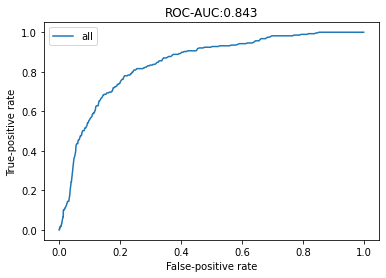

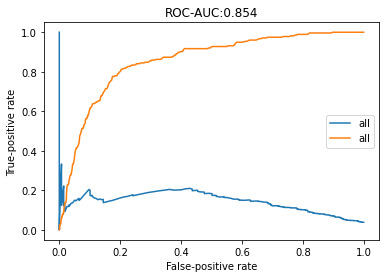

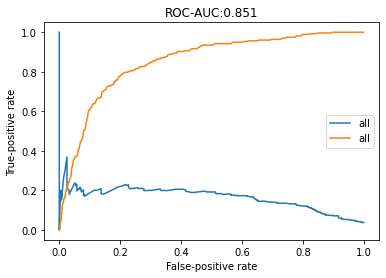

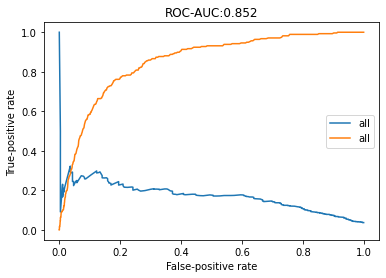

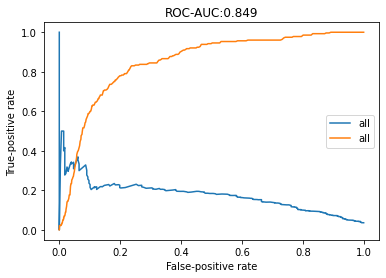

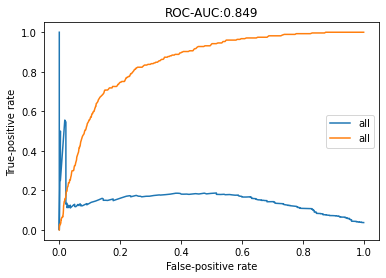

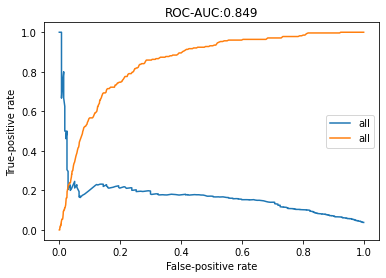

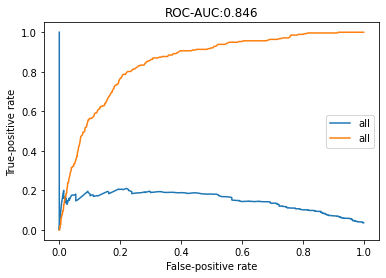

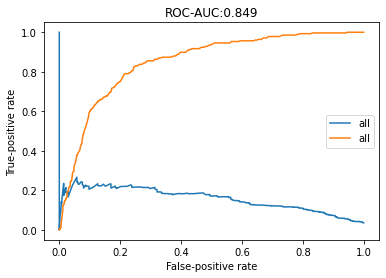

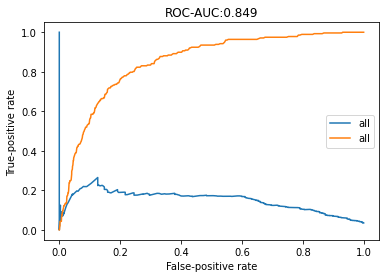

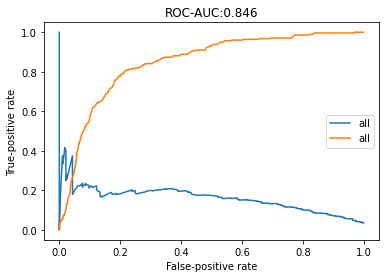

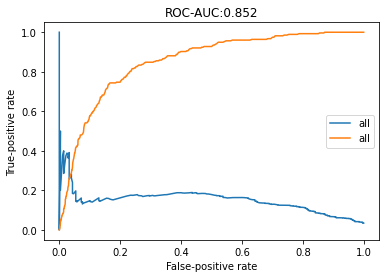

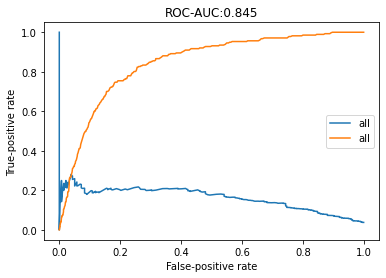

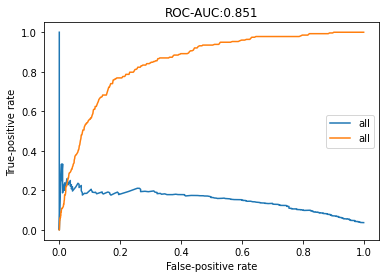

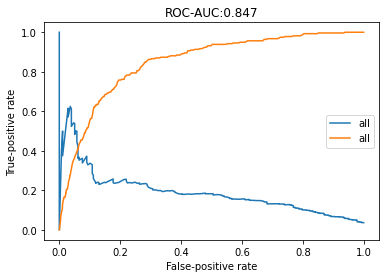

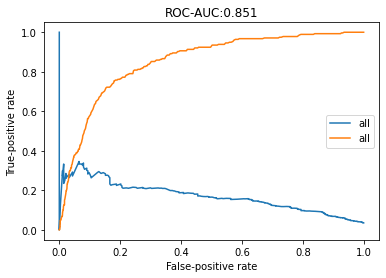

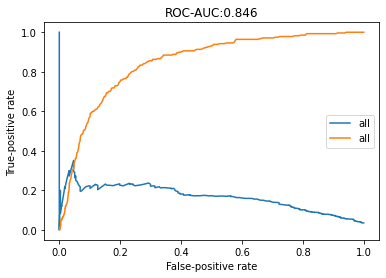

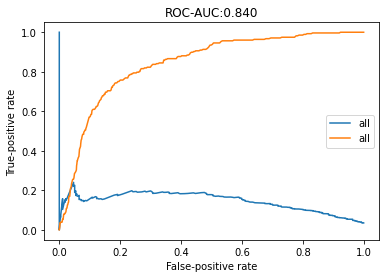

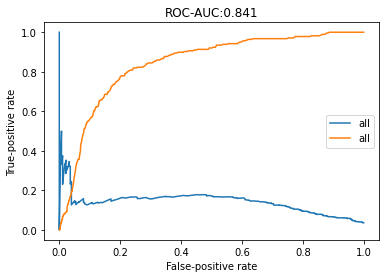

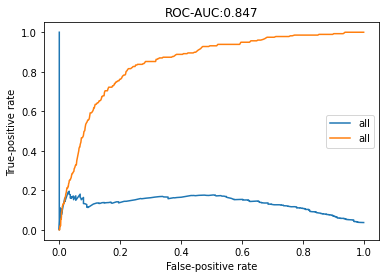

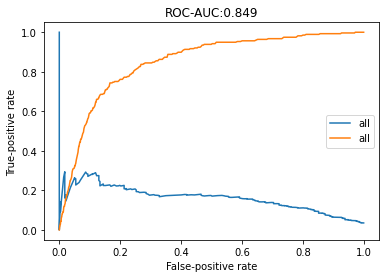

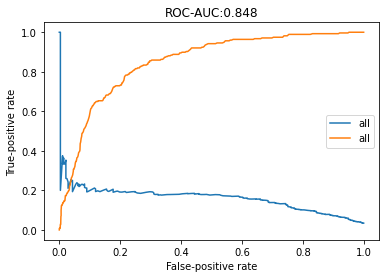

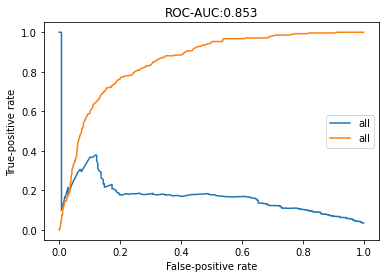

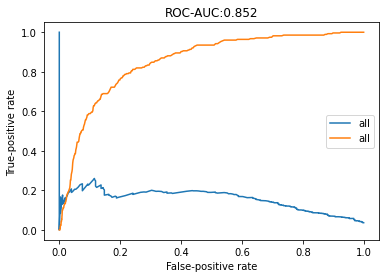

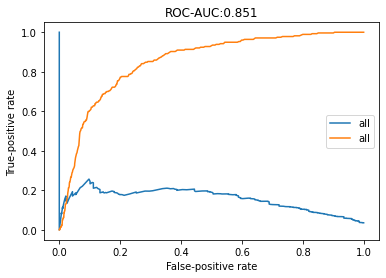

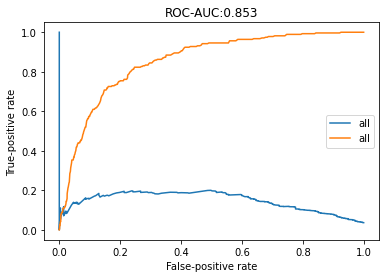

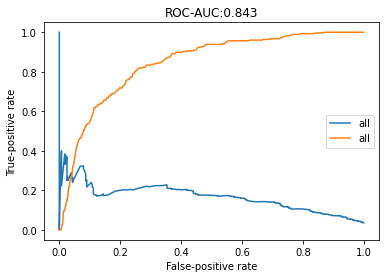

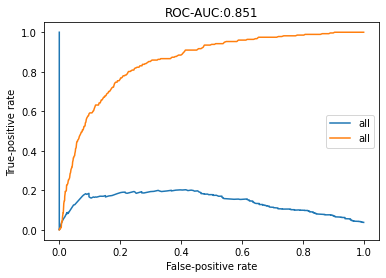

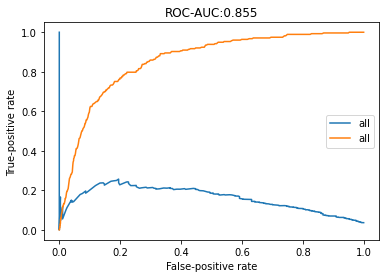

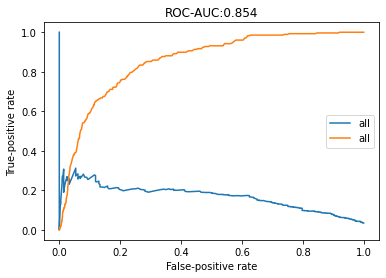

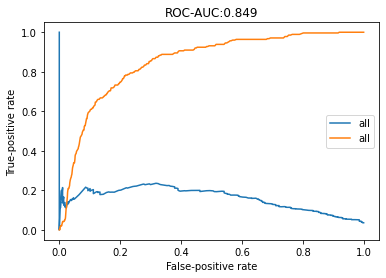

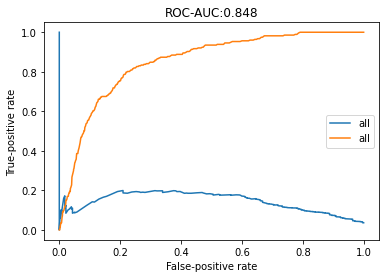

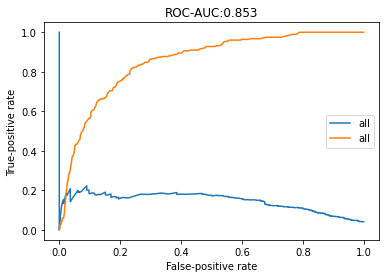

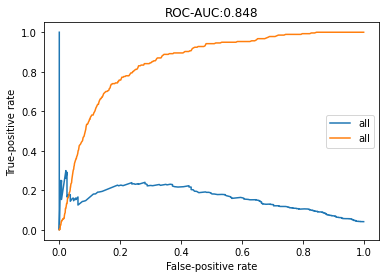

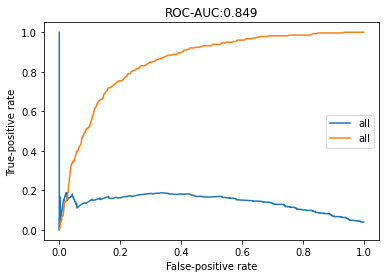

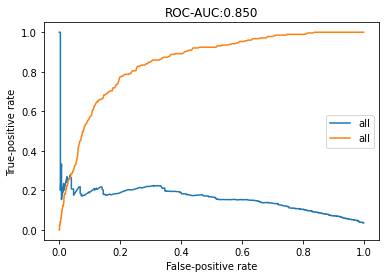

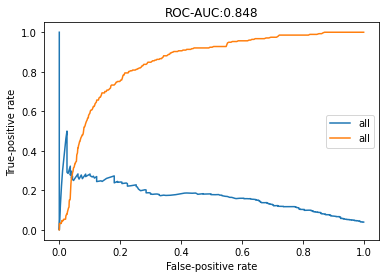

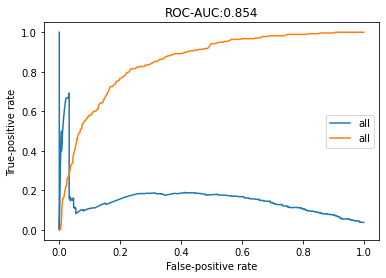

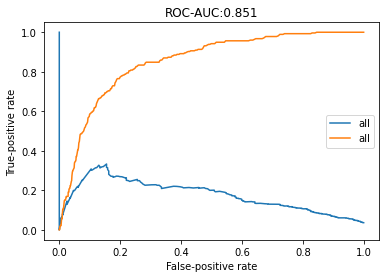

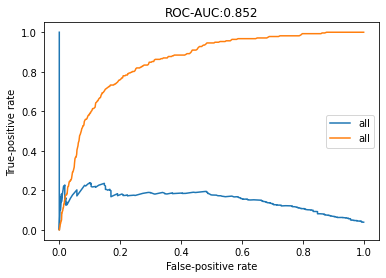

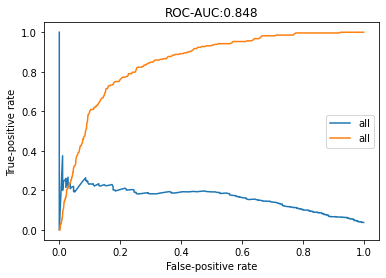

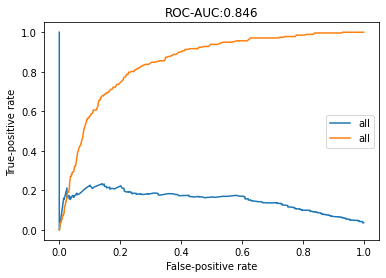

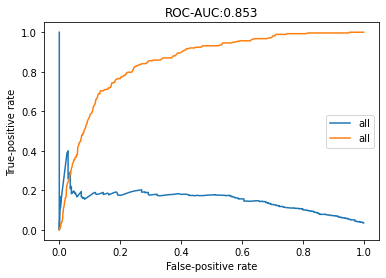

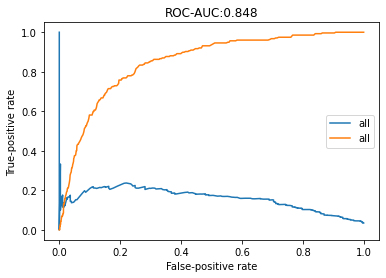

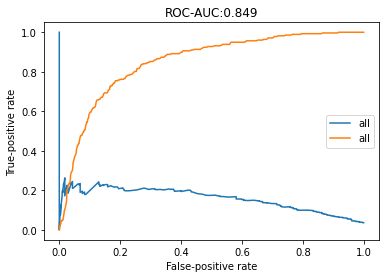

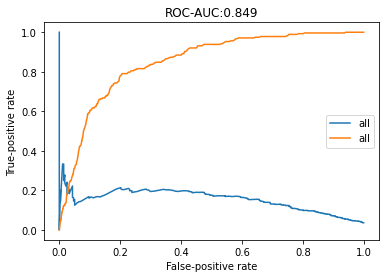

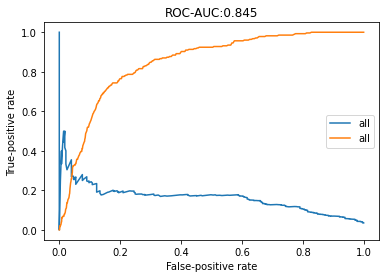

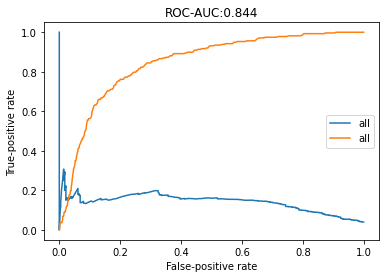

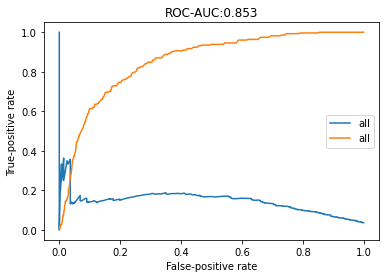

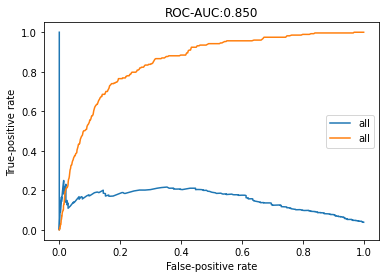

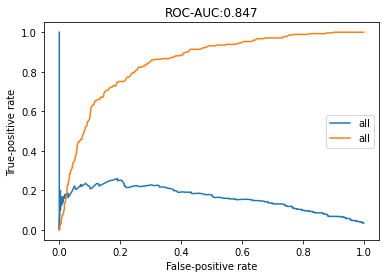

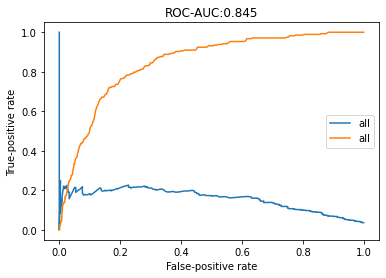

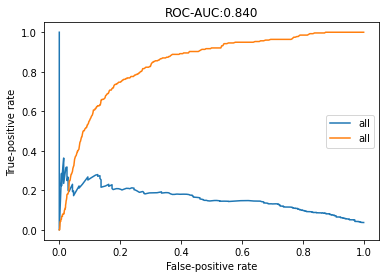

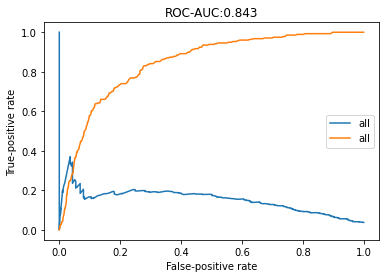

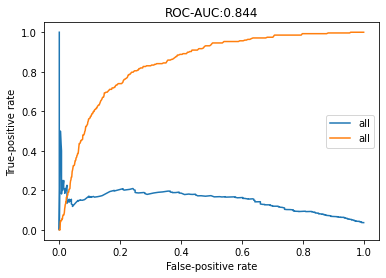

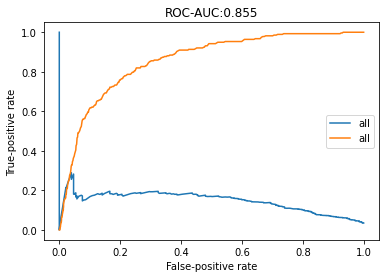

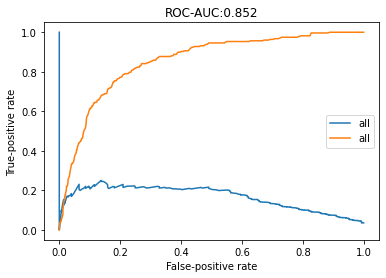

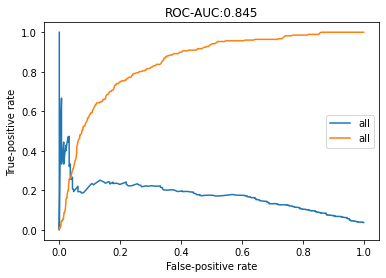

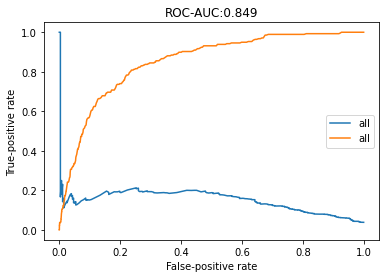

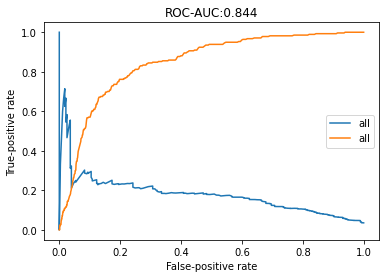

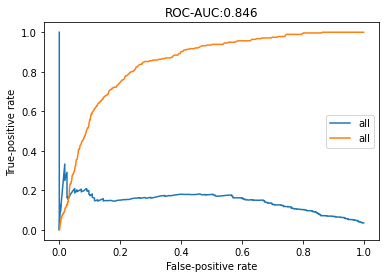

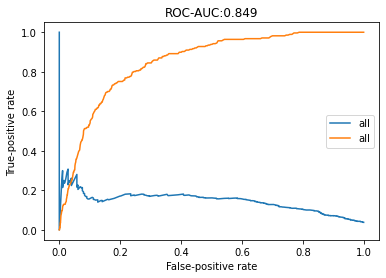

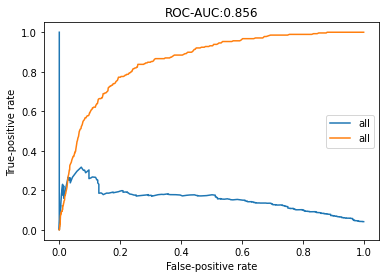

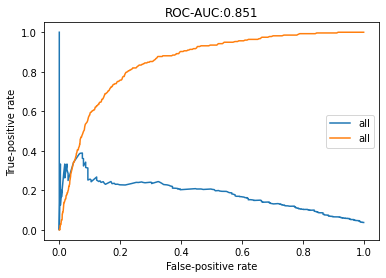

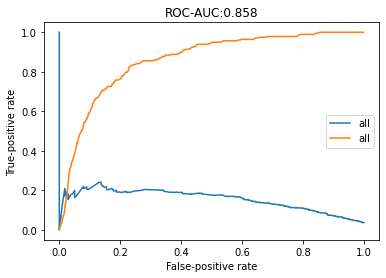

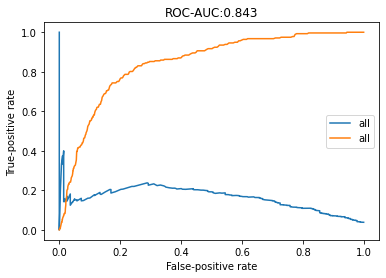

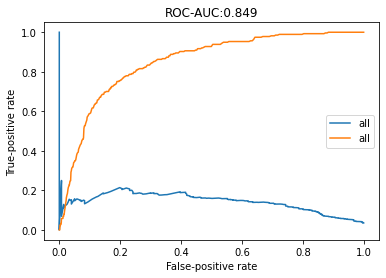

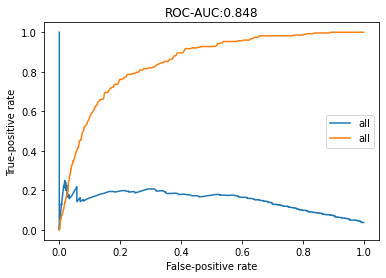

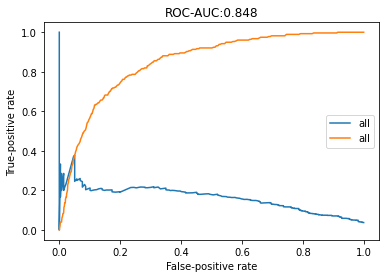

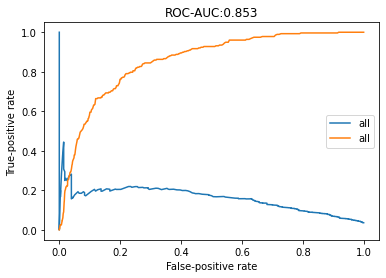

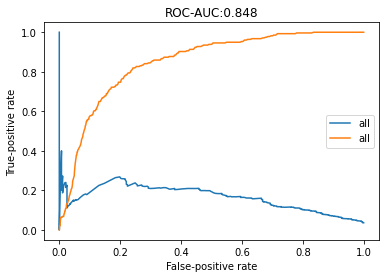

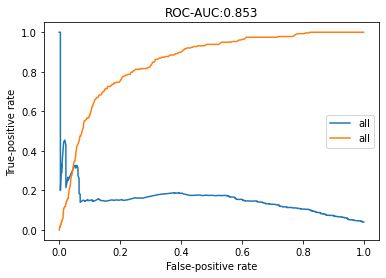

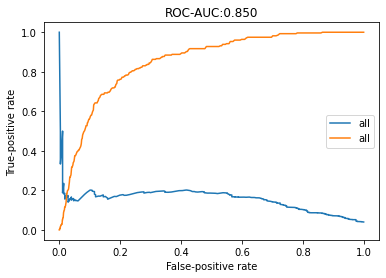

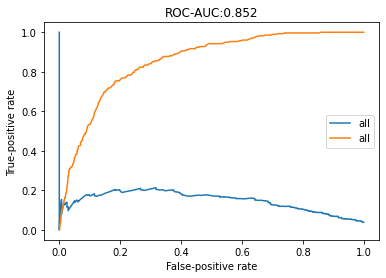

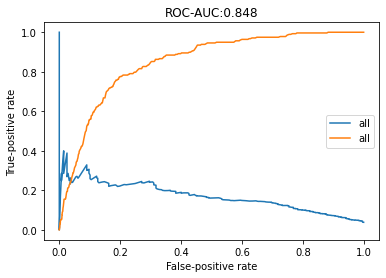

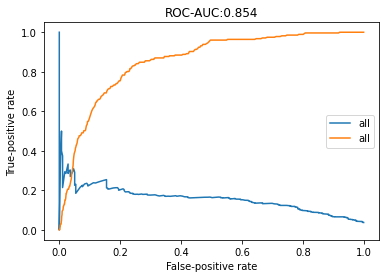

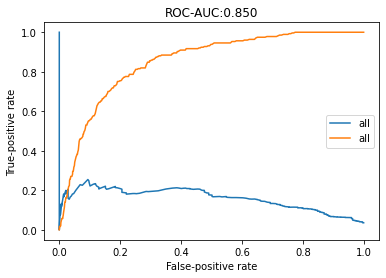

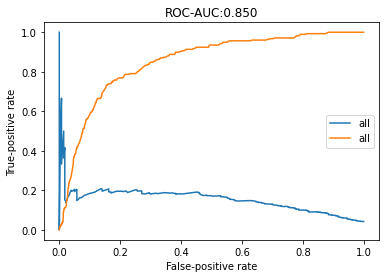

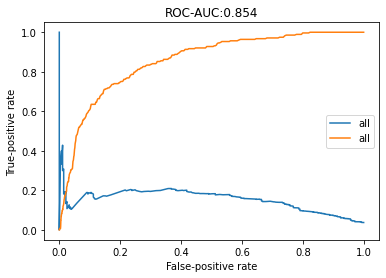

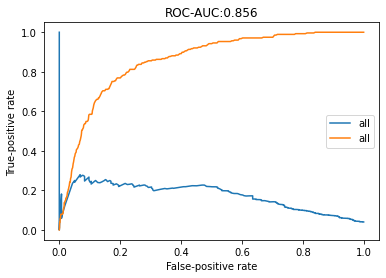

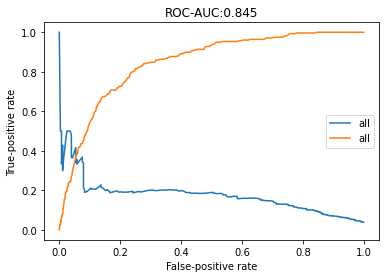

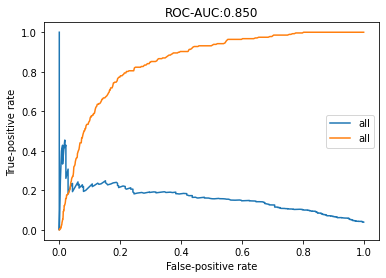

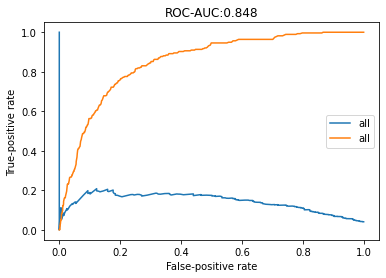

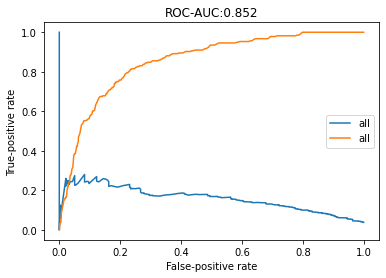

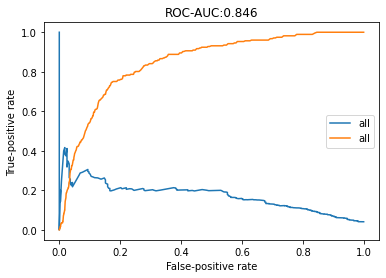

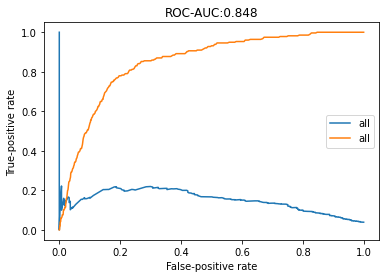

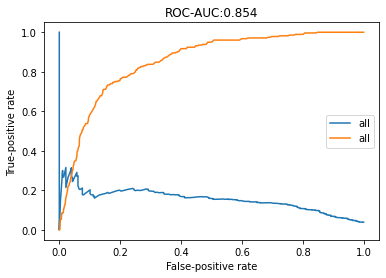

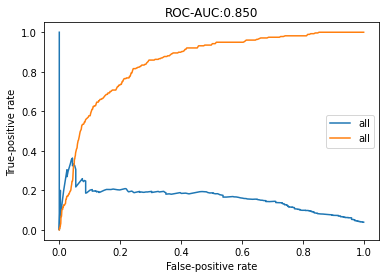

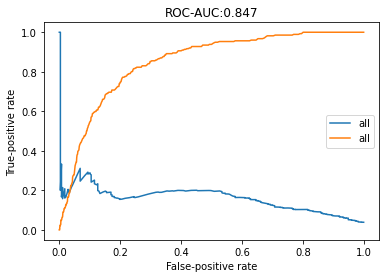

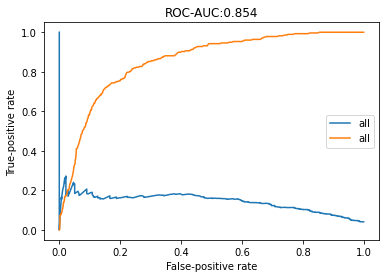

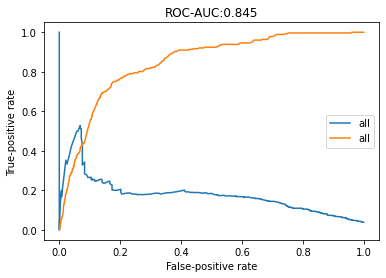

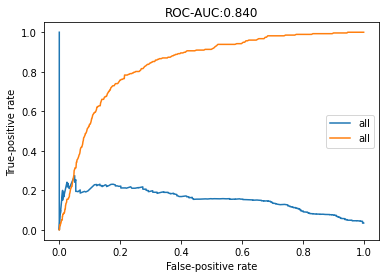

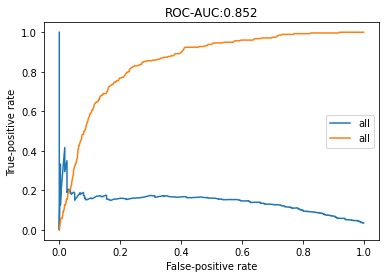

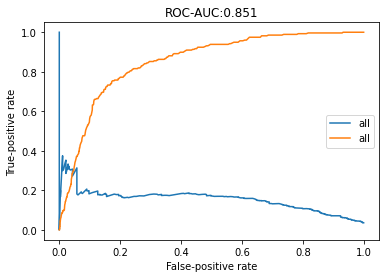

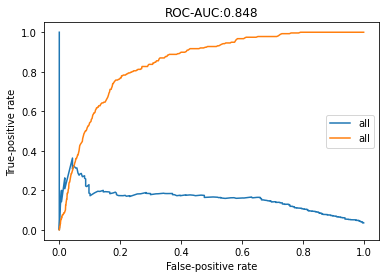

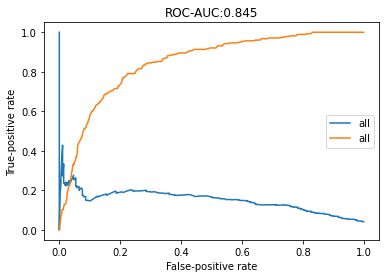

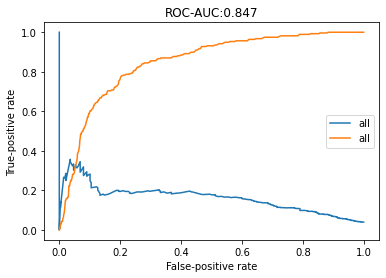

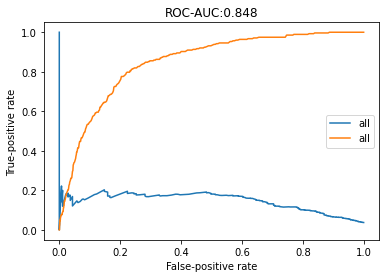

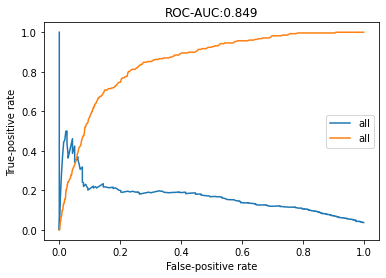

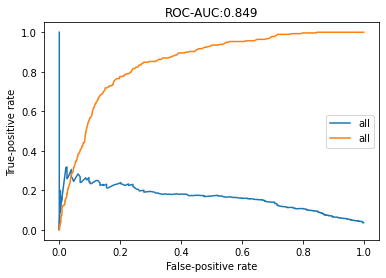

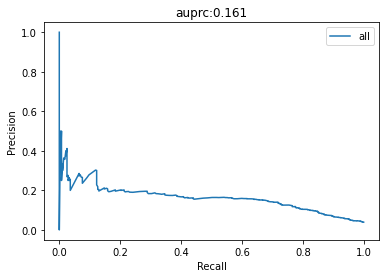

In [13]:
rt, rte, pt, rect, aup , spec = [], [], [], [], [], []
for c, i in enumerate(["1225", "5624", "992578", "3719", "6487", "295643", "73154", "2319", "334212", "12654"]):
    #for i in ["951", "7803", "636", "3150", "3784"]:
    print(i)
    
    cov_train = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds_with_val/preprocessed_covariate_race_matrix_post_surgery_7_days_train_{}.csv".format(i))
    cov_test = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds_with_val/preprocessed_covariate_race_matrix_post_surgery_7_days_test_{}.csv".format(i))
    cov_val = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds_with_val/preprocessed_covariate_race_matrix_post_surgery_7_days_val_{}.csv".format(i))

    cov_train_final, cov_test_final, cov_val_final = preprocess.preprocess(cov_train, cov_test, cov_val)
    
    f = open(r'columns_60', 'rb')
    fin_cols = pickle.load(f)
    cov_train_final = cov_train_final[fin_cols]
    cov_test_final = cov_test_final[fin_cols]

    rf, best_params, best_score_train = model.rf_models(cov_train_final, 10)
    
    roc, ap = 0, 0
    for r in rf:
        roc_train, roc_test, pr_test, re_test, spec_test, auprc, pr, re, thresh_test, \
        predictions = pred_test.pred_rf_test(r, cov_train_final, cov_test_final, thresh = 0.5)
        print(roc_test, auprc)
        roc += roc_test
        ap += auprc
        
    rte.append(roc/len(rf))
    aup.append(ap/len(rf))

In [15]:
#mean and confidence interval
print(np.mean(rte), (np.std(rte) * 2.262)/(len(rte)**0.5))
print(np.mean(aup), (np.std(aup) * 2.262)/(len(aup)**0.5))

0.8494948155368597 0.0011632379657471586
0.15686467866819023 0.001240616496273568


# **subgroup analysis**

In [2]:
cov_train = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds_with_val/preprocessed_covariate_race_matrix_post_surgery_7_days_train_{}.csv".format('1225'))
cov_test = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds_with_val/preprocessed_covariate_race_matrix_post_surgery_7_days_test_{}.csv".format('1225'))
cov_val = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds_with_val/preprocessed_covariate_race_matrix_post_surgery_7_days_val_{}.csv".format('1225'))

cov_train_final, cov_test_final, cov_val_final = preprocess.preprocess(cov_train, cov_test, cov_val)
f = open(r'columns_60', 'rb')
fin_cols = pickle.load(f)

white_male_train = cov_train_final.loc[(cov_train_final['patient_race_white'] == 1)&(cov_train_final['patient_gender_male'] == 1), fin_cols]
non_white_male_train = cov_train_final.loc[(cov_train_final['patient_race_white'] == 0)&(cov_train_final['patient_gender_male'] == 1), fin_cols]
white_female_train = cov_train_final.loc[(cov_train_final['patient_race_white'] == 1)&(cov_train_final['patient_gender_male'] == 0), fin_cols]
non_white_female_train = cov_train_final.loc[(cov_train_final['patient_race_white'] == 0)&(cov_train_final['patient_gender_male'] == 0), fin_cols]
sen_data_train = [white_male_train.drop(['patient_gender_male'], axis = 1), non_white_male_train.drop(['patient_gender_male'], axis = 1), 
            white_female_train.drop(['patient_gender_male'], axis = 1), non_white_female_train.drop(['patient_gender_male'], axis = 1)]

white_male = cov_test_final.loc[(cov_test_final['patient_race_white'] == 1)&(cov_test_final['patient_gender_male'] == 1), fin_cols]
non_white_male = cov_test_final.loc[(cov_test_final['patient_race_white'] == 0)&(cov_test_final['patient_gender_male'] == 1), fin_cols]
white_female = cov_test_final.loc[(cov_test_final['patient_race_white'] == 1)&(cov_test_final['patient_gender_male'] == 0), fin_cols]
non_white_female = cov_test_final.loc[(cov_test_final['patient_race_white'] == 0)&(cov_test_final['patient_gender_male'] == 0), fin_cols]
sen_data = [white_male.drop(['patient_gender_male'], axis = 1), non_white_male.drop(['patient_gender_male'], axis = 1), 
            white_female.drop(['patient_gender_male'], axis = 1), non_white_female.drop(['patient_gender_male'], axis = 1)]
sen_list = ['white_male', 'non_white_male', 'white_female', 'non_white_female']

white_male_val = cov_val_final.loc[(cov_val_final['patient_race_white'] == 1)&(cov_val_final['patient_gender_male'] == 1), fin_cols]
non_white_male_val = cov_val_final.loc[(cov_val_final['patient_race_white'] == 0)&(cov_val_final['patient_gender_male'] == 1), fin_cols]
white_female_val = cov_val_final.loc[(cov_val_final['patient_race_white'] == 1)&(cov_val_final['patient_gender_male'] == 0), fin_cols]
non_white_female_val = cov_val_final.loc[(cov_val_final['patient_race_white'] == 0)&(cov_val_final['patient_gender_male'] == 0), fin_cols]
sen_data_val = [white_male_val.drop(['patient_gender_male'], axis = 1), non_white_male_val.drop(['patient_gender_male'], axis = 1), 
            white_female_val.drop(['patient_gender_male'], axis = 1), non_white_female_val.drop(['patient_gender_male'], axis = 1)]

cov_train_final = cov_train_final[fin_cols]
cov_test_final = cov_test_final[fin_cols]
cov_val_final = cov_val_final[fin_cols]

cov_train_final.drop(['patient_gender_male'], axis = 1, inplace = True)
cov_test_final.drop(['patient_gender_male'], axis = 1, inplace = True)
cov_val_final.drop(['patient_gender_male'], axis = 1, inplace = True)

rf, best_params, best_score_train = model.rf_models(cov_train_final)

In [10]:
for i, race_data in enumerate(sen_data):
    p_test = rf.predict_proba(race_data.drop(['ssi'], axis = 1))[:,1]

    max_val = 0
    for thresh in np.arange(0.01, 0.9, 0.001):
        temp_pred = p_test.copy()
        temp_pred[temp_pred >= thresh] = 1
        temp_pred[temp_pred < thresh] = 0
        conf_matrix = confusion_matrix(race_data['ssi'], temp_pred)
        TP = conf_matrix[1][1]
        TN = conf_matrix[0][0]
        FP = conf_matrix[0][1]
        FN = conf_matrix[1][0]
        spec = (TN / float(TN + FP))
        prec = (TP / float(TP + FP))
        rec = (TP / float(TP + FN))

        f1 = (2*prec*rec)/(prec + rec)

        if f1 > max_val:
            max_val = f1
            best_thresh = thresh
    print("max f1: ", max_val, ", best_thresh: ", best_thresh)

/home/vib/.local/share/virtualenvs/vib-GyX7iQ-j/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


max f1:  0.31893687707641194 , best_thresh:  0.09699999999999992


/home/vib/.local/share/virtualenvs/vib-GyX7iQ-j/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/vib/.local/share/virtualenvs/vib-GyX7iQ-j/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


max f1:  0.233502538071066 , best_thresh:  0.1109999999999999


/home/vib/.local/share/virtualenvs/vib-GyX7iQ-j/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/vib/.local/share/virtualenvs/vib-GyX7iQ-j/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


max f1:  0.1911262798634812 , best_thresh:  0.09699999999999992


/home/vib/.local/share/virtualenvs/vib-GyX7iQ-j/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


max f1:  0.2745098039215686 , best_thresh:  0.10299999999999991


In [9]:
thresh = [0.1269999999999999, 0.08699999999999992, 0.10299999999999991, 0.054999999999999966]
for i, race_data in enumerate(sen_data):
    p_test = rf.predict_proba(race_data.drop(['ssi'], axis = 1))[:,1]

    max_val = 0
    
    temp_pred = p_test.copy()
    temp_pred[temp_pred >= 0.5] = 1
    temp_pred[temp_pred < 0.5] = 0
    conf_matrix = confusion_matrix(race_data['ssi'], temp_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    spec = (TN / float(TN + FP))
    prec = (TP / float(TP + FP))
    rec = (TP / float(TP + FN))

    f1 = (2*prec*rec)/(prec + rec)
    print("max f1: ", f1, ", best_thresh: ", best_thresh)

/home/vib/.local/share/virtualenvs/vib-GyX7iQ-j/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


max f1:  nan , best_thresh:  0.054999999999999966


/home/vib/.local/share/virtualenvs/vib-GyX7iQ-j/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


max f1:  nan , best_thresh:  0.054999999999999966


/home/vib/.local/share/virtualenvs/vib-GyX7iQ-j/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


max f1:  nan , best_thresh:  0.054999999999999966
max f1:  nan , best_thresh:  0.054999999999999966


/home/vib/.local/share/virtualenvs/vib-GyX7iQ-j/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


# **Race analysis**

1225
american_indian_or_alaska_native
asian
hispanic
native_hawaiian_or_other_pacific_islander
other
white
african_american_or_black
5624
american_indian_or_alaska_native
asian
hispanic
native_hawaiian_or_other_pacific_islander
other
white
african_american_or_black
992578
american_indian_or_alaska_native
asian
hispanic
native_hawaiian_or_other_pacific_islander


pred_test.ipynb:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  "metadata": {},


other
white
african_american_or_black
3719
american_indian_or_alaska_native
asian
hispanic
native_hawaiian_or_other_pacific_islander
other
white
african_american_or_black
6487
american_indian_or_alaska_native
asian
hispanic
native_hawaiian_or_other_pacific_islander
other
white
african_american_or_black
295643
american_indian_or_alaska_native
asian
hispanic
native_hawaiian_or_other_pacific_islander
other
white
african_american_or_black
73154
american_indian_or_alaska_native
asian
hispanic
native_hawaiian_or_other_pacific_islander
other
white
african_american_or_black
2319
american_indian_or_alaska_native
asian
hispanic
native_hawaiian_or_other_pacific_islander
other
white
african_american_or_black
334212
american_indian_or_alaska_native
asian
hispanic
native_hawaiian_or_other_pacific_islander
other
white
african_american_or_black
12654
american_indian_or_alaska_native
asian
hispanic
native_hawaiian_or_other_pacific_islander
other
white
african_american_or_black


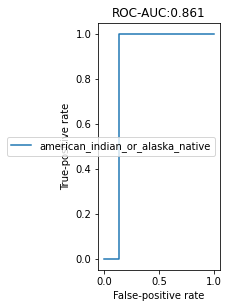

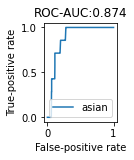

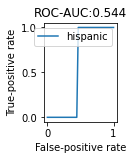

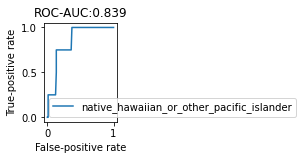

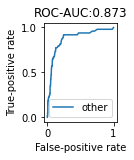

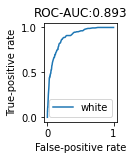

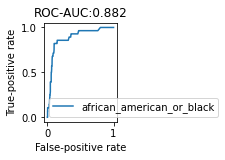

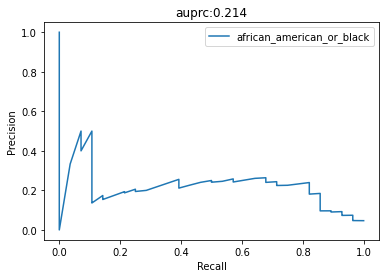

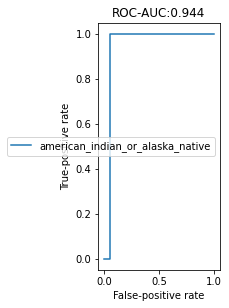

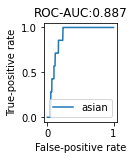

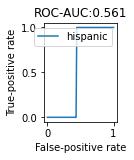

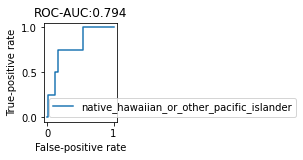

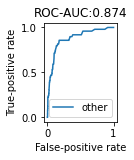

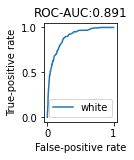

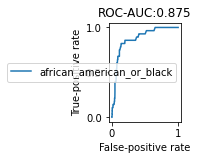

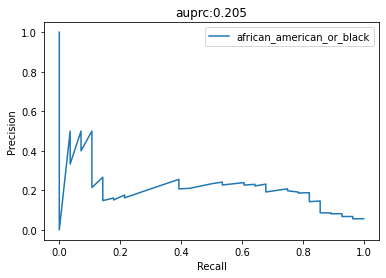

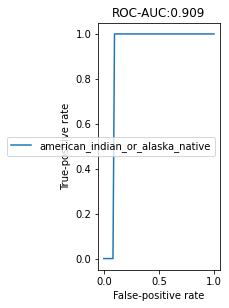

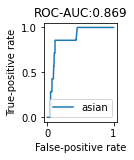

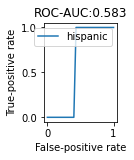

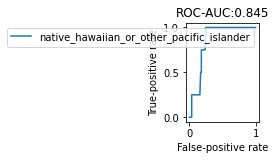

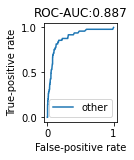

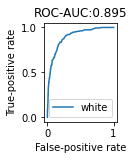

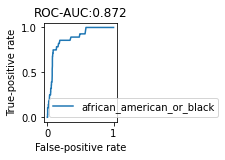

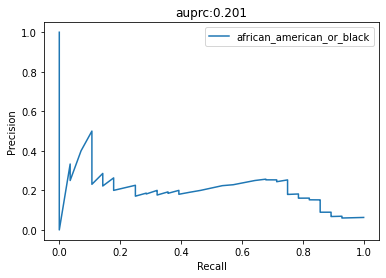

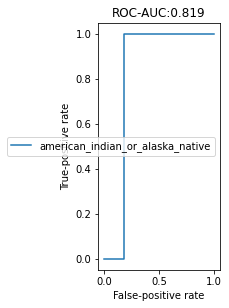

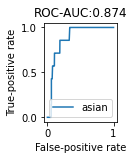

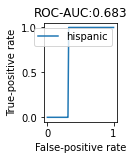

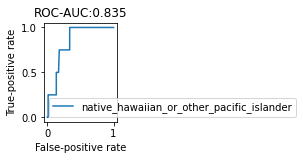

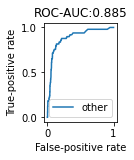

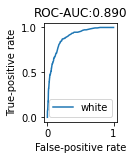

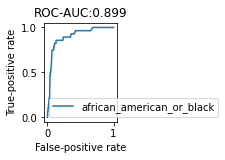

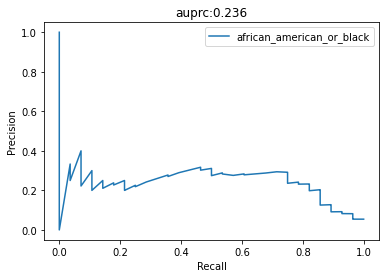

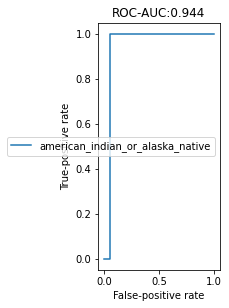

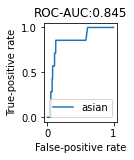

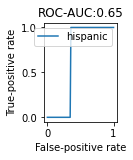

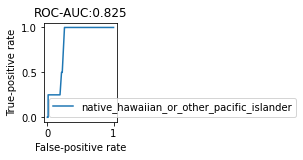

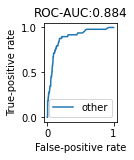

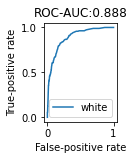

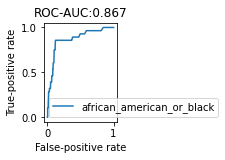

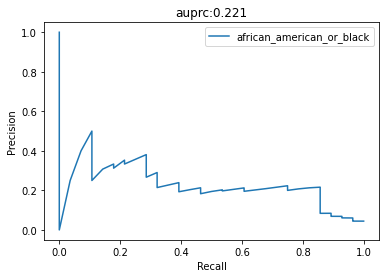

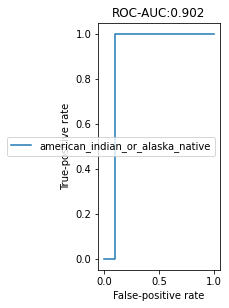

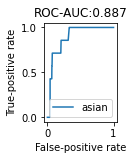

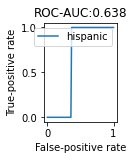

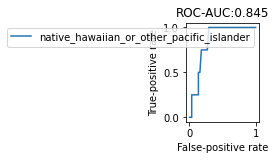

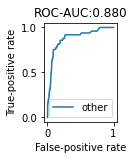

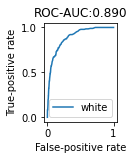

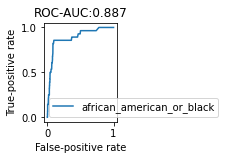

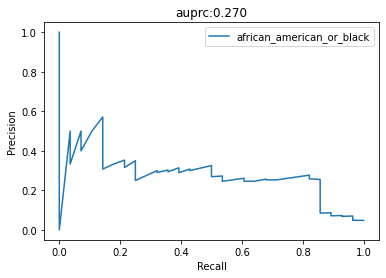

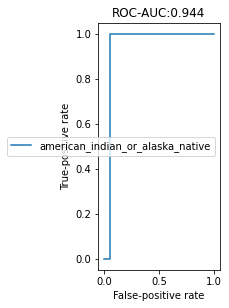

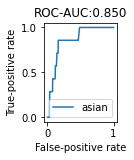

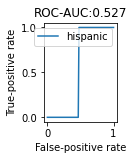

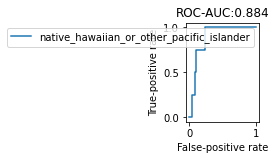

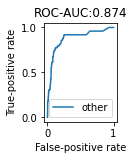

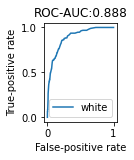

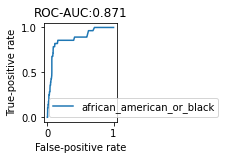

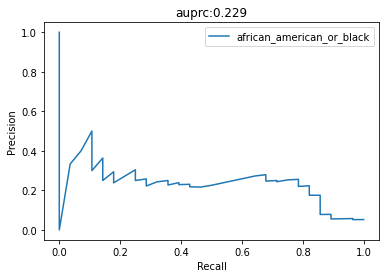

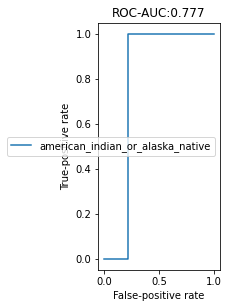

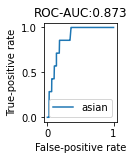

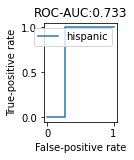

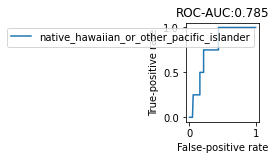

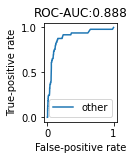

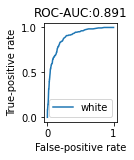

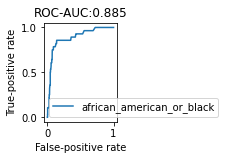

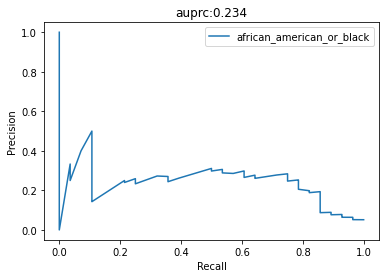

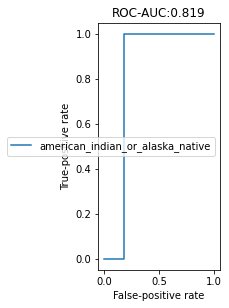

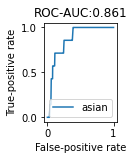

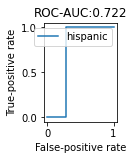

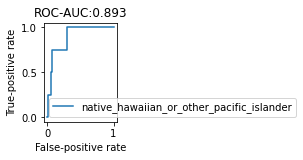

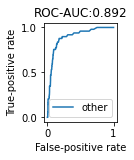

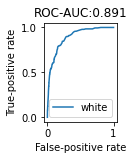

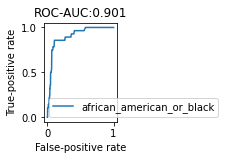

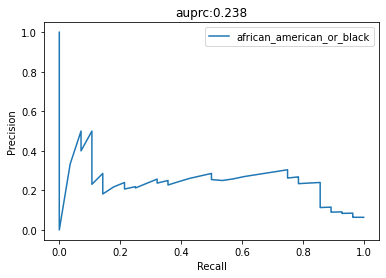

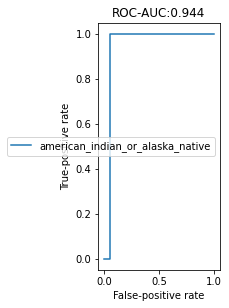

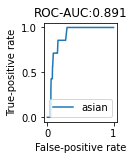

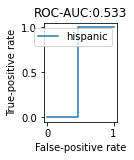

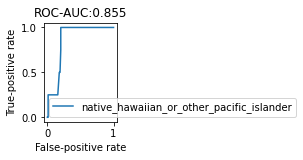

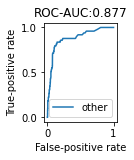

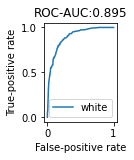

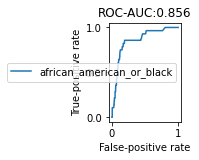

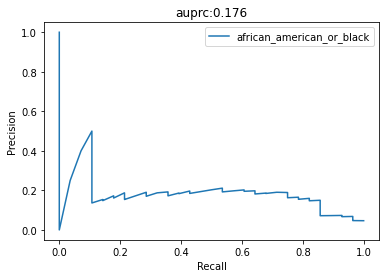

In [2]:
res = pd.DataFrame()
race_list = ['patient_race_american_indian_or_alaska_native',
 'patient_race_asian',
 'patient_race_hispanic',
 'patient_race_native_hawaiian_or_other_pacific_islander',
 'patient_race_other',
 'patient_race_white',
 'patient_race_african_american_or_black']

f = open(r'columns_60', 'rb')
fin_cols = pickle.load(f)

for c, i in enumerate(["1225", "5624", "992578", "3719", "6487", "295643", "73154", "2319", "334212", "12654"]):
    print(i)
    cov_train = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds/preprocessed_race_covariate_matrix/preprocessed_covariate_race_matrix_post_surgery_7_days_train_{}.csv".format(i))
    cov_test = pd.read_csv("processed_data_2014-18/preprocessed_subgroup_covariate_matrix_strat_folds/preprocessed_race_covariate_matrix/preprocessed_covariate_race_matrix_post_surgery_7_days_test_{}.csv".format(i))
    cov_train_final, _ = preprocess.preprocess(cov_train, cov_test)
    
    cov_train_final = cov_train_final[fin_cols]
    
    rf, best_params, best_score_train = model.rf_models(cov_train_final)
    rt, rte, pt, rect, ap , spec = [], [], [], [], [], []
    plt.figure(figsize = [10, 10])
    for r, race in enumerate(race_list):
        
        print(race[13:])
        _, cov_test_final = preprocess.preprocess(cov_train, cov_test, race = race)
        cov_test_final = cov_test_final[fin_cols]
        
        plt.subplot(2, 4, r+1)
        roc_train, roc_test, pr_test, re_test, spec_test, auprc, pr, re, thresh_test, \
        predictions = pred_test.pred_rf_test(rf, cov_train_final, cov_test_final, thresh = 0.08, race = race)
        
        rt.append(roc_train)
        rte.append(roc_test)
        pt.append(pr_test)
        rect.append(re_test)
        spec.append(spec_test)
        ap.append(auprc)
        
    #plt.savefig(race + "_new_feat_4_rf.jpg")    
    met = ["Recall", "Precision", "Specificity", "ROC", "Auprc"]
    index = [x + y for x in met for y in race_list]
    
    split = rect + pt + spec + rte + ap
    arr = np.array(split)
    arr = np.around(arr, decimals = 2)
    res["split_" + str(c)] = pd.Series(arr, index = index)
    res.to_csv("races_rf_curr_weights_metrics.csv")


In [11]:
def CI(x):
    arr = df.iloc[x, :-1].values
    ci = np.round((np.std(arr) * 2.262)/(len(arr)**0.5), 3)
    m = np.round(np.mean(arr), 3)
    return str(m) + '±' + str(ci)

df = pd.read_csv('races_rf_curr_weights_metrics.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df['CI'] = np.arange(len(df))
df['CI'] = df.CI.apply(lambda x: CI(x))
df

,split_0,split_1,split_2,split_3,split_4,split_5,split_6,split_7,split_8,split_9,CI
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0±0.0
1,0.43,0.29,0.43,0.43,0.29,0.43,0.29,0.43,0.43,0.43,0.388±0.046
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0±0.0
3,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.00,0.25,0.25,0.225±0.054
4,0.55,0.47,0.51,0.53,0.45,0.49,0.51,0.49,0.47,0.53,0.5±0.021
5,0.52,0.54,0.56,0.51,0.53,0.57,0.52,0.57,0.54,0.56,0.542±0.015
6,0.68,0.61,0.64,0.75,0.46,0.64,0.68,0.75,0.75,0.54,0.65±0.065
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0±0.0
8,0.08,0.06,0.07,0.09,0.05,0.08,0.06,0.08,0.07,0.09,0.073±0.009
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0±0.0
